#ՀՀ շուկայում մեքենաների գները․ Աշխատանք տվյալների հետ
Picsart Academy. Data Science 2022
Սերգեյ Հայրապետյան, Արեգ Մելքոնյան

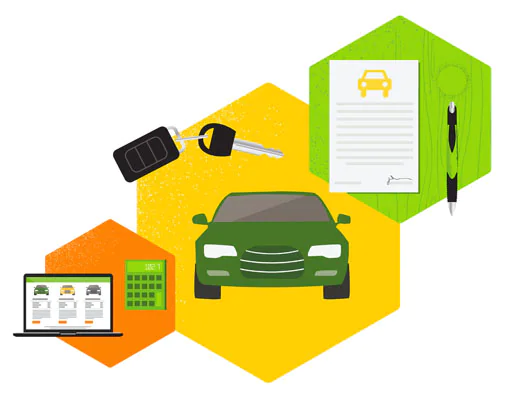

#  1) About Project 

**Նախագծի նպատակն է ստեղծել Հայաստանում վաճառվող ավտոմեքենաների տվյալների շտեմարան և կատարել բնութագրական վերլուծություն։**

Տվյալների աղբյուր է ընտրվել ավտոմեքենաների վաճառքի խոշոր  վեբ կայքերից մեկը՝ auto.am-ը։

Բնութագրիչների ցանկը ներկայացված է ստորև․
1. մակնիշ
2. մոդել
3. արտադրման տարի
4. արժեք
5. թափք
6. ղեկ
7. փոխանցման տուփ
8. շարժիչ
9. քարշակ
10. մաքսազերծված է

## 1.1 Data Source

1) https://auto.am/  կայք։
Տվյալները դուրս են բերվելու web scraping-ի միջոցով։

## 1.2 Defining outcomes


**Տվյալների վերլուծության արդյունքում նախատեսվում է ստանալ հետևյալ հարցերի պատասխանները․**
  ****
  * **Ո՞ր մակնիշի ավտոմեքենաների գներն են ամենաշատը տարբերվում**
  * **Ո՞ր մակնիշի ավտոմեքենաների ունեն ամենաշատ պահանջարկը , գների վարիացիան ըստ մակնիշների**
  * **Ո՞ր մակնիշի ավտոմեքենաներն են գերակշռում վաճառքում**
  ****


  * **Որո՞նք են ամենաթանկ ավտոմեքենաները**
  * **Որո՞նք են ամենաթանկ  ավտոմեքենաների մոդելները**
  * **Ինչպե՞ս է նկարագրվում ավտոմեքենաների միջին գնի բաշխումը**

  ****

  * **Ի՞նչ թափքով ավտոմեքենաներն են ամենաշատը ներկայացված**
  * **Ինչպե՞ս է տարբերվում միջին գինն ըստ մեքենայի գույնի**
  * **Ինչպե՞ս է տարբերվում միջին գինն ըստ մեքենայի ղեկի**
  * **Ինչպե՞ս է տարբերվում միջին գինն ըստ մեքենայի փոխանցման տուփի**
  * **Ո՞ր մոդելում է առավելապես տարբերվում ղեկի տարբերությամբ ավտոմեքենաների գները**
  
  ****
  * **Ո՞ր մակնիշներն են ավելի տարածված**
  * **Ինչպե՞ս են տարբերվում ավտոմեքենաների գները ըստ գույների**
  * **Որո՞նք են մակնիշներում մեծ մասնաբաժին ունեցող մոդելները**
  ****

# 2) Web scraping

##2.1 Website scraping code

WebSite scraping code

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# moduls for scrapping
from selenium import webdriver
from selenium.webdriver.common.by import By
import time

# Chrome browser 
driver = webdriver.Chrome()

def write_in_csv(data):
  """This function is writing into csv file."""

  data = data.text.split("է")
    
  for info in data:
      with open("data.csv", "a") as f:
          f.write(info)
          f.write("\n")
          
        
#Taking data page-by-page.
for i in range(1, 500):
    url = '''https://auto.am/search/passenger-cars?q={"category":"1","page":"''' + \
          str(i) + \
          '''","sort":"latest","layout":"list","user":{"dealer":"0","id":""},"year":{"gt":"1911","lt":"2024"},''' + \
          '''"usdprice":{"gt":"0","lt":"100000000"},"mileage":{"gt":"10","lt":"1000000"}}'''
    driver.get(url)
    
    time.sleep(4)
    elements = driver.find_elements(By.CLASS_NAME, "list")

    # Writing scrapped page in csv
    for item in elements:    
        write_in_csv(item)
    

In [ ]:
sep = ["$", "Պ", "պ", "֏", "€"]

# write the data without useless data
with open("cars.csv", "a") as file: 
    with open("data.csv") as file1:
        for row in file1:
            if not row.strip():
                file.write("\n")

            if row[0] in sep:
                file.write(row)

            else:
                try:
                    if int(row[0]):
                        file.write(row)  
                except:
                    pass   

Create csv file

In [ ]:
import csv

# write the data of each car in lines
with open('cars.csv', 'r') as file:
    lines = file.readlines()

data = []

temp_list = []

for line in lines:
    if not line.strip():
        if temp_list:
            data.append(temp_list)
            temp_list = []
    else:
        temp_list.append(line.strip())

data.append(temp_list)

with open('example.csv', 'w', newline='') as csv_file:
    writer = csv.writer(csv_file)

    for row in data:
        writer.writerow(row)                            

In [ ]:
# cleaning all useless data and writing it into csv file.
with open("file.csv", "r") as file, open("final.csv", "a") as file1:
    
    for line in file:
        line = line.split(",")
        line[1] = line[1].replace("  ", ",")
        line[1] = line[1].replace(" ", ",", 1)
        
        for i in range(len(line)):
            line[i] = line[i].replace('"', "")
            
        line.remove(line[-2])
        
        if len(line[-2]) > 12:
             line.remove(line[-2])
        
                    
        for item in line[3:]:
            try:
                if item[1].isdigit() or item[1].isascii():
                     line.remove(item)
            except:
                pass      
            
        if len(line) > 9:
                line.remove(line[-2])
                    
        for item in line:
            if len(line) != 9:
                break
            
            file1.write(item)
            file1.write(",")
            

##2.2 The Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
import io

In [ ]:
# Uploading file.
data = files.upload()

Saving cars.csv to cars (1).csv


In [ ]:
# Creating DataFrame.
df = pd.read_csv(io.StringIO(data['cars.csv'].decode('utf-8')), on_bad_lines='skip')

In [ ]:
# Cleaning empty column.
df.drop("Unnamed: 0", inplace=True, axis=1)

In [ ]:
df

,Price,Year,Make,Model,Mileage,Body style,Gearbox,Hand drive,Engine,Color,Custom cleared
0,$ 7 600,2021,Volkswagen,Polo,38000 կմ,Սեդան,Մեխանիկական,Ձախ,Բենզին,Սպիտակ,մաքսազերծված չ
1,$ 41 000,2020,Mitsubishi,Pajero,10 կմ,Ամենագնաց,Ավտոմատ,Ձախ,Բենզին,Սպիտակ,Մաքսազերծված
2,$ 6 000,2005,Nissan,Tiida,156000 կմ,Սեդան,Ավտոմատ,Ձախ,Գազ,Այլ գույն,Մաքսազերծված
3,$ 6 400,2006,Toyota,Land Cruiser Prado,170000 կմ,Ամենագնաց,Ավտոմատ,Ձախ,Դիզել,Սև,մաքսազերծված չ
4,$ 13 000,2019,Hyundai,Kona,28393 մղոն,Ամենագնաց,Ավտոմատ,Ձախ,Բենզին,Արծաթագույն,մաքսազերծված չ
...,...,...,...,...,...,...,...,...,...,...,...
9551,$ 15 700,2018,Toyota,Tundra,19374 կմ,Պիկապ,Ավտոմատ,Ձախ,Բենզին,Սև,մաքսազերծված չ
9552,$ 6 700,2018,Kia,Sportage,18347 կմ,Ամենագնաց,Ավտոմատ,Ձախ,Բենզին,Արծաթագույն,մաքսազերծված չ
9553,$ 12 300,2016,Toyota,Tundra,23714 կմ,Պիկապ,Ավտոմատ,Ձախ,Բենզին,Մոխրագույն,մաքսազերծված չ
9554,$ 13 500,2017,Toyota,Tundra,23417 կմ,Պիկապ,Ավտոմատ,Ձախ,Բենզին,Սպիտակ,մաքսազերծված չ


#3) Data Preprocessing and Cleaning

**Data Preprocessing Steps**

* `price` type convert to float 
* `year` type convert to int 
* `milegae` type convert to int
* `Hand drive` type convert to int
* `Gearbox` type convert to int
* `Custom Cleared` type convert to int
* `Anomalies` cleaning 


In [ ]:
df.shape

(9556, 11)

In [ ]:
df.dtypes

Price             object
Year               int64
Make              object
Model             object
Mileage           object
Body style        object
Gearbox           object
Hand drive        object
Engine            object
Color             object
Custom cleared    object
dtype: object

In [ ]:
df.isnull().sum()

Price              0
Year               0
Make               0
Model              0
Mileage            0
Body style         0
Gearbox            0
Hand drive         0
Engine             0
Color              0
Custom cleared    40
dtype: int64

##3.1 **Price** type convert to int

In [ ]:
df.loc[df["Price"] == "Պայմ.", "Price"] = np.nan

In [ ]:
df['Price'] = df['Price'].where(df['Price'].str.startswith("$"),np.nan)      

In [ ]:
df.isnull().sum()

Price             261
Year                0
Make                0
Model               0
Mileage             0
Body style          0
Gearbox             0
Hand drive          0
Engine              0
Color               0
Custom cleared     40
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.head()

,Price,Year,Make,Model,Mileage,Body style,Gearbox,Hand drive,Engine,Color,Custom cleared
0,$ 7 600,2021,Volkswagen,Polo,38000 կմ,Սեդան,Մեխանիկական,Ձախ,Բենզին,Սպիտակ,մաքսազերծված չ
1,$ 41 000,2020,Mitsubishi,Pajero,10 կմ,Ամենագնաց,Ավտոմատ,Ձախ,Բենզին,Սպիտակ,Մաքսազերծված
2,$ 6 000,2005,Nissan,Tiida,156000 կմ,Սեդան,Ավտոմատ,Ձախ,Գազ,Այլ գույն,Մաքսազերծված
3,$ 6 400,2006,Toyota,Land Cruiser Prado,170000 կմ,Ամենագնաց,Ավտոմատ,Ձախ,Դիզել,Սև,մաքսազերծված չ
4,$ 13 000,2019,Hyundai,Kona,28393 մղոն,Ամենագնաց,Ավտոմատ,Ձախ,Բենզին,Արծաթագույն,մաքսազերծված չ


In [ ]:
df["Price"] = df["Price"].str.replace('$','')

In [ ]:
df["Price"] = df["Price"].str.replace(' ','')

In [ ]:
df['Price'] = df['Price'].astype(int)

In [ ]:
df.dtypes

Price              int64
Year               int64
Make              object
Model             object
Mileage           object
Body style        object
Gearbox           object
Hand drive        object
Engine            object
Color             object
Custom cleared    object
dtype: object

## 3.2 **Mileage** type convert to int, and convert mile  to km

In [ ]:
# deleting tailing 'կմ' substring
df["Mileage"] = df["Mileage"].str.replace('կմ','')

In [ ]:
#converts miles to km
def miles_to_km(row):
    """deleting tailing 'մղոն' substring
        and convert  mile  to km"""
        
    if "մղոն" in row["Mileage"]:
        distance = float(row["Mileage"].split()[0])
        return distance * 1.60934
    else:
        return row["Mileage"]


In [ ]:
df["Mileage"] = df.apply(miles_to_km, axis=1)

In [ ]:
df['Mileage'] = df['Mileage'].astype(float)

In [ ]:
df.dtypes

Price               int64
Year                int64
Make               object
Model              object
Mileage           float64
Body style         object
Gearbox            object
Hand drive         object
Engine             object
Color              object
Custom cleared     object
dtype: object

## 3.3 **Hand drive** type "Ձախ" convert to 1 and "Աջ" to 0

In [ ]:
# change Hand drive type
df["Hand drive"] = np.where(df["Hand drive"] == " Ձախ", 1,
                                np.where(df["Hand drive"] == " Աջ", 0, np.nan))

<ipython-input-25-57090006c0a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Hand drive"] = np.where(df["Hand drive"] == " Ձախ", 1,


In [ ]:
df.isnull().sum()

Price              0
Year               0
Make               0
Model              0
Mileage            0
Body style         0
Gearbox            0
Hand drive        47
Engine             0
Color              0
Custom cleared     0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.shape

(9210, 11)

## 3.4 **Gearbox** type "մեխանիկական" convert to 1 and "ավտոմատ" to 0

In [ ]:
# change Gearbox type
df["Gearbox"] = np.where(df["Gearbox"] == " Մեխանիկական", 1,
                                np.where(df["Gearbox"] == " Ավտոմատ", 0, np.nan))

In [ ]:
df.isnull().sum()

Price              0
Year               0
Make               0
Model              0
Mileage            0
Body style         0
Gearbox           75
Hand drive         0
Engine             0
Color              0
Custom cleared     0
dtype: int64

In [ ]:
df = df.dropna()
df.head()

,Price,Year,Make,Model,Mileage,Body style,Gearbox,Hand drive,Engine,Color,Custom cleared
0,7600,2021,Volkswagen,Polo,38000.00000,Սեդան,1.0,1.0,Բենզին,Սպիտակ,մաքսազերծված չ
1,41000,2020,Mitsubishi,Pajero,10.00000,Ամենագնաց,0.0,1.0,Բենզին,Սպիտակ,Մաքսազերծված
2,6000,2005,Nissan,Tiida,156000.00000,Սեդան,0.0,1.0,Գազ,Այլ գույն,Մաքսազերծված
3,6400,2006,Toyota,Land Cruiser Prado,170000.00000,Ամենագնաց,0.0,1.0,Դիզել,Սև,մաքսազերծված չ
4,13000,2019,Hyundai,Kona,45693.99062,Ամենագնաց,0.0,1.0,Բենզին,Արծաթագույն,մաքսազերծված չ


## 3.5 **Custom Cleared** type "մաքսազերծված է" convert to 1 and "մաքսազերծված չէ" to 0

In [ ]:
# change Custom cleared type
df["Custom cleared"] = np.where(df["Custom cleared"] == " Մաքսազերծված", 1,
                                np.where(df["Custom cleared"] == " մաքսազերծված չ", 0, np.nan))

In [ ]:
df.isnull().sum()

Price             0
Year              0
Make              0
Model             0
Mileage           0
Body style        0
Gearbox           0
Hand drive        0
Engine            0
Color             0
Custom cleared    0
dtype: int64

In [ ]:
df["Custom cleared"] = df["Custom cleared"].astype(int)
df["Hand drive"] = df["Hand drive"].astype(int)
df["Gearbox"] = df["Gearbox"].astype(int)

In [ ]:
df.head()

,Price,Year,Make,Model,Mileage,Body style,Gearbox,Hand drive,Engine,Color,Custom cleared
0,7600,2021,Volkswagen,Polo,38000.00000,Սեդան,1,1,Բենզին,Սպիտակ,0
1,41000,2020,Mitsubishi,Pajero,10.00000,Ամենագնաց,0,1,Բենզին,Սպիտակ,1
2,6000,2005,Nissan,Tiida,156000.00000,Սեդան,0,1,Գազ,Այլ գույն,1
3,6400,2006,Toyota,Land Cruiser Prado,170000.00000,Ամենագնաց,0,1,Դիզել,Սև,0
4,13000,2019,Hyundai,Kona,45693.99062,Ամենագնաց,0,1,Բենզին,Արծաթագույն,0


In [ ]:
df.shape

(9135, 11)

## 3.6 Cleaning anomalies

In [ ]:
df.dtypes

Price               int64
Year                int64
Make               object
Model              object
Mileage           float64
Body style         object
Gearbox             int64
Hand drive          int64
Engine             object
Color              object
Custom cleared      int64
dtype: object

In [ ]:
tesla_engine = (df['Make'] == "Tesla") & (df['Engine'] != " Էլեկտրական")
df.loc[tesla_engine, "Engine"] = " Էլեկտրական"

In [ ]:
df.isnull().sum()

Price             0
Year              0
Make              0
Model             0
Mileage           0
Body style        0
Gearbox           0
Hand drive        0
Engine            0
Color             0
Custom cleared    0
dtype: int64

In [ ]:
df.dtypes

Price               int64
Year                int64
Make               object
Model              object
Mileage           float64
Body style         object
Gearbox             int64
Hand drive          int64
Engine             object
Color              object
Custom cleared      int64
dtype: object

In [ ]:
df.shape

(9135, 11)

##3.7 The Dataset Summary Statistics

In [ ]:
df.describe()


,Price,Year,Mileage,Gearbox,Hand drive,Custom cleared
count,9135.000000,9135.000000,9135.000000,9135.000000,9135.000000,9135.000000
mean,13454.088123,2017.494910,59383.957771,0.019485,0.996606,0.194198
std,16943.925765,3.985598,63567.330001,0.138231,0.058158,0.395604
min,1000.000000,1953.000000,10.000000,0.000000,0.000000,0.000000
25%,5200.000000,2017.000000,18396.000000,0.000000,1.000000,0.000000
50%,9000.000000,2018.000000,24588.000000,0.000000,1.000000,0.000000
75%,15500.000000,2020.000000,85000.000000,0.000000,1.000000,0.000000
max,350000.000000,2023.000000,852950.200000,1.000000,1.000000,1.000000


#4) Data analysis and visualization

## 4.1 Count of **Make** in descending order 

In [ ]:
# Group the data by "make" and get the count
grouped_df = df.groupby("Make").size().reset_index(name='count')

# Create a new DataFrame with the "make" and "count" columns
new_df = grouped_df[["Make", "count"]]
new_df = new_df.sort_values('count', ascending=False)
new_df

,Make,count
46,Toyota,1224
33,Nissan,960
19,Hyundai,841
23,Kia,754
13,Ford,657
4,BMW,654
30,Mercedes-Benz,649
17,Honda,472
29,Mazda,467
9,Chevrolet,384


In [ ]:
ndf = new_df.head(10)
s = pd.Series(ndf['count'])
s = s.mul(100) / 9058
s

46    13.512917
33    10.598366
19     9.284610
23     8.324133
13     7.253257
4      7.220137
30     7.164937
17     5.210863
29     5.155664
9      4.239346
Name: count, dtype: float64

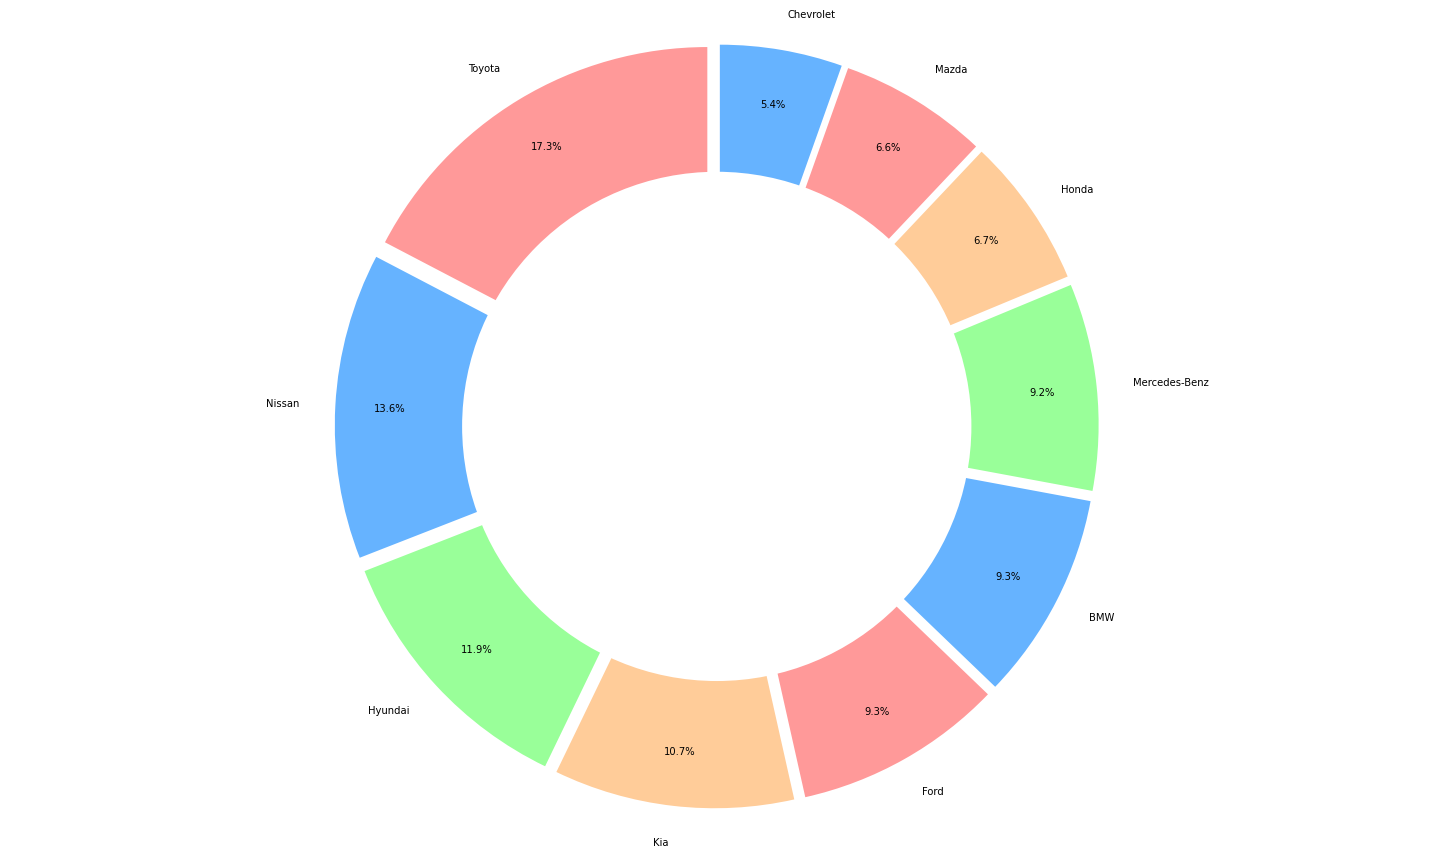

In [ ]:
# Pie chart
labels = new_df["Make"].head(10)
# colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
# explsion
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05)
fig1, ax1 = plt.subplots(figsize=(20, 12))
plt.pie(s, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
# draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()

plt.show()


## 4.2 The mean **Price** of each **Make**

In [ ]:
make_mean = df.groupby('Make')[['Price']].mean()
make_mean = make_mean.sort_values('Price', ascending=False)
make_mean

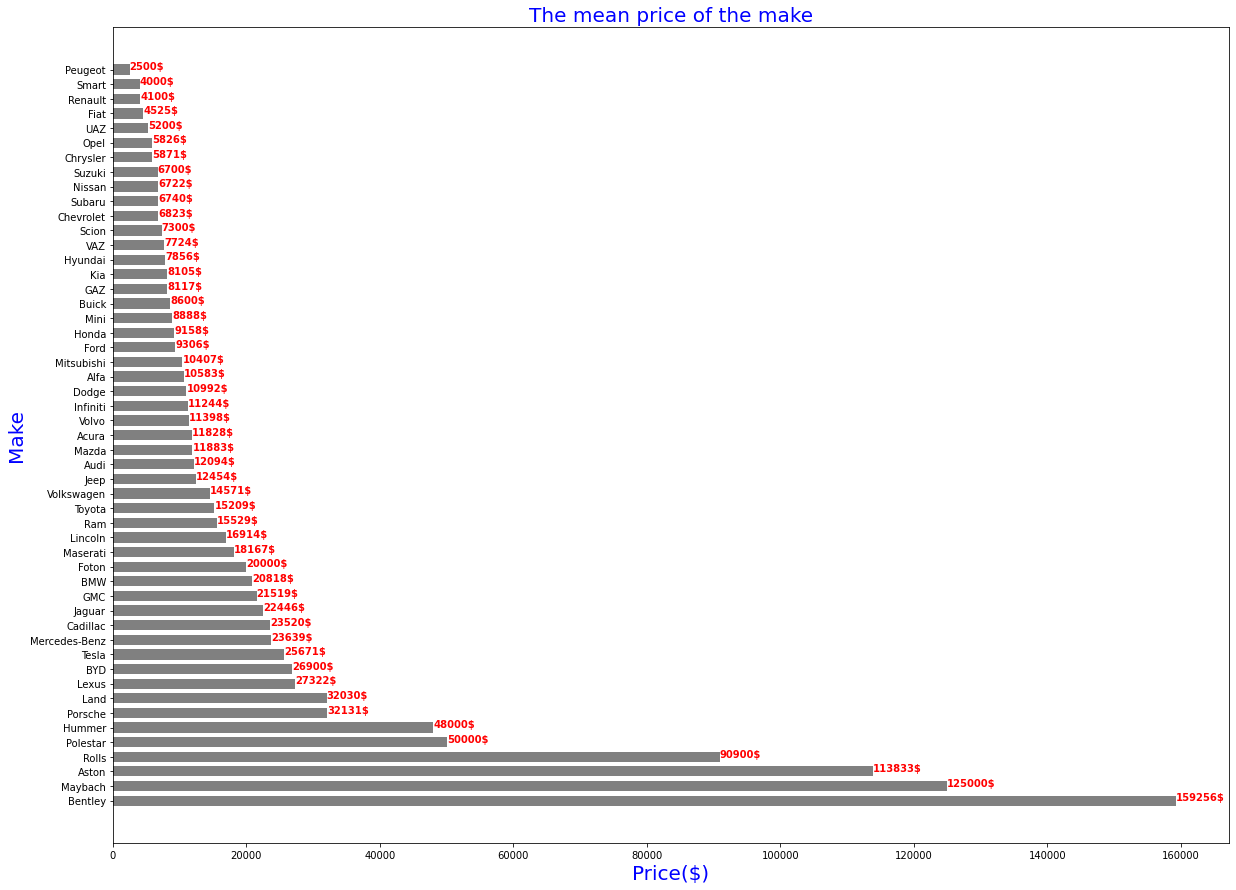

In [ ]:
make = make_mean.index
price = make_mean['Price'].round()
fig, ax = plt.subplots(figsize=(20, 15))
plt.barh(make, price, color='grey', height=0.7)
plt.title('The mean price of the make', color="blue", fontsize=20)
plt.xlabel('Price($)', color="blue", fontsize=20)
plt.ylabel('Make', color="blue", fontsize=20)
for i, v in enumerate(price):
    ax.text(v + 12, i, str(v)[:-2] + '$', color='red', fontweight='bold')

##4.3 Top10 expensive cars **Makes**

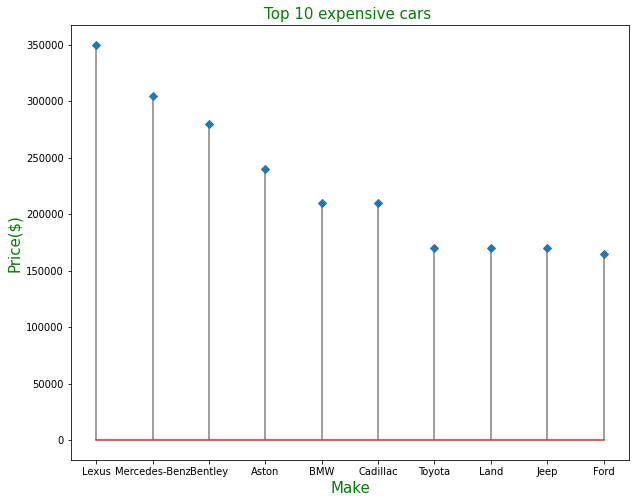

In [ ]:
# Top10 expensive cars Makes.
expensive = df.groupby("Make")["Price"].max().sort_values(ascending=False)
expensive = expensive[:10]
index = expensive.index
fig, ax = plt.subplots(figsize=(10, 8))
ax.stem(index, expensive, linefmt="grey", markerfmt="D", use_line_collection = True)
ax.set_title('Top 10 expensive cars ', color="green", fontsize=15)
ax.set_xlabel('Make', color="green", fontsize=15)
ax.set_ylabel('Price($)', color="green", fontsize=15);

##4.4 The mean **Price** of each **Engine** type

In [ ]:
Engine = df.groupby('Engine')[['Price']].mean()
Engine

,Price
Engine,
Բենզին,12784.698946
Գազ,11167.658730
Դիզել,38370.270270
Էլեկտրական,29775.495238
Հիբրիդ,15446.571429


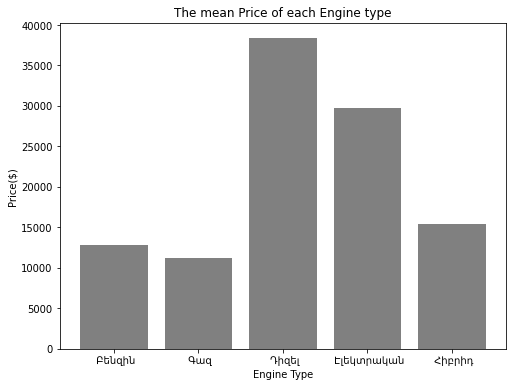

In [ ]:
engine = Engine.index
price = Engine['Price'].round()
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(engine, price, color='grey')
ax.set_title('The mean Price of each Engine type')
ax.set_xlabel('Engine Type')
ax.set_ylabel('Price($)');
# for i, v in enumerate(price):
#     ax.text(i - 0.25, v + 5, str(v)[:-2] + '$', color='blue', fontweight='bold')

##4.5 The mean **Price** of each **Color**

In [ ]:
Color = df.groupby('Color')[['Price']].mean()
Color.sort_values('Price')

,Price
Color,
Արծաթագույն,9093.045710
Կարմիր,9588.602941
Սմբկագույն,9715.000000
Բեժ,9948.148148
Կանաչ,11170.263158
Ոսկեգույն,12491.666667
Մոխրագույն,12856.188649
Նարնջագույն,13383.333333
Սպիտակ,13496.889571


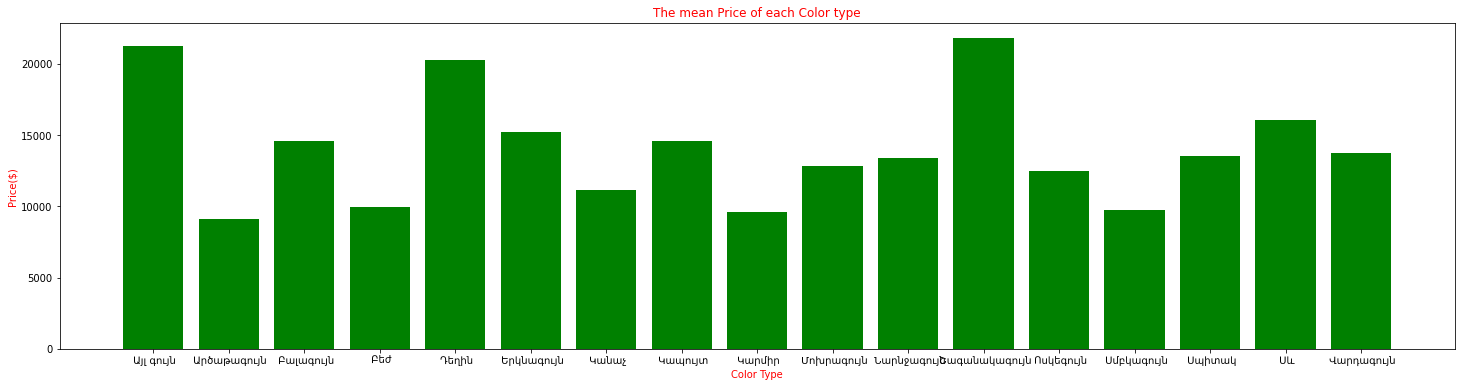

In [ ]:
color = Color.index
price = Color['Price'].round()
fig, ax = plt.subplots(figsize=(25, 6))
ax.bar(color, price, color='green')
ax.set_title('The mean Price of each Color type', color="red")
ax.set_xlabel('Color Type', color="red")
ax.set_ylabel('Price($)', color="red");

## 4.6  The **Make** mean **Price** depending on **Gearbox**

In [ ]:
gb = df.groupby('Gearbox')[['Price']].mean()
gb

,Price
Gearbox,
0,13560.588925
1,8094.943820


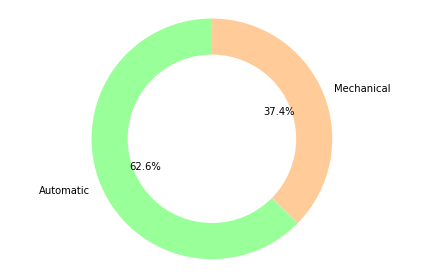

In [ ]:
# Pie chart
labels = ['Automatic', 'Mechanical']
sizes = gb['Price']
#colors
colors = ['#99ff99','#ffcc99']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [ ]:
Gearbox = df.groupby(['Make','Gearbox'])[['Price']].mean().unstack()
Gearbox

Price              
Gearbox                    0             1
Make                                      
Acura           11827.631579           NaN
Alfa            10583.333333           NaN
Aston          113833.333333           NaN
Audi            12154.929577   3500.000000
BMW             20978.428793   7893.750000
BYD             38650.000000   3400.000000
Bentley        159255.555556           NaN
Buick            8600.000000           NaN
Cadillac        23519.642857           NaN
Chevrolet        6822.697917           NaN
Chrysler         5871.407407           NaN
Dodge           10992.500000           NaN
Fiat             4525.000000           NaN
Ford             9261.580595  10866.666667
Foton                    NaN  20000.000000
GAZ                      NaN   8116.666667
GMC             21519.285714           NaN
Honda            9163.507431   6800.000000
Hummer          48000.000000           NaN
Hyundai          7854.166667   9500.000000
Infiniti        11244.347826           NaN
Jaguar          22446.428571           NaN
Jeep            12454.127907           NaN
Kia              8110.802929   6766.666667
Land            31910.706522  37500.000000
Lexus           27322.239264           NaN
Lincoln         16913.636364           NaN
Maserati        18166.666667           NaN
Maybach        125000.000000           NaN
Mazda           11906.301724   8233.333333
Mercedes-Benz   24157.129952   5488.888889
Mini             8487.500000  14500.000000
Mitsubishi      10563.125000   7066.666667
Nissan           6669.037657  19450.000000
Opel             6350.000000   5760.000000
Peugeot                  NaN   2500.000000
Polestar        50000.000000           NaN
Porsche         32131.355932           NaN
Ram             15528.571429           NaN
Renault          5700.000000   2500.000000
Rolls           90900.000000           NaN
Scion            7300.000000           NaN
Smart            4000.000000           NaN
Subaru           6652.912621   8233.333333
Suzuki           6700.000000           NaN
Tesla           25732.426136  14900.000000
Toyota          15229.126541  11678.571429
UAZ                      NaN   5200.000000
VAZ                      NaN   7723.529412
Volkswagen      14868.282686   6918.181818
Volvo           11398.076923           NaN

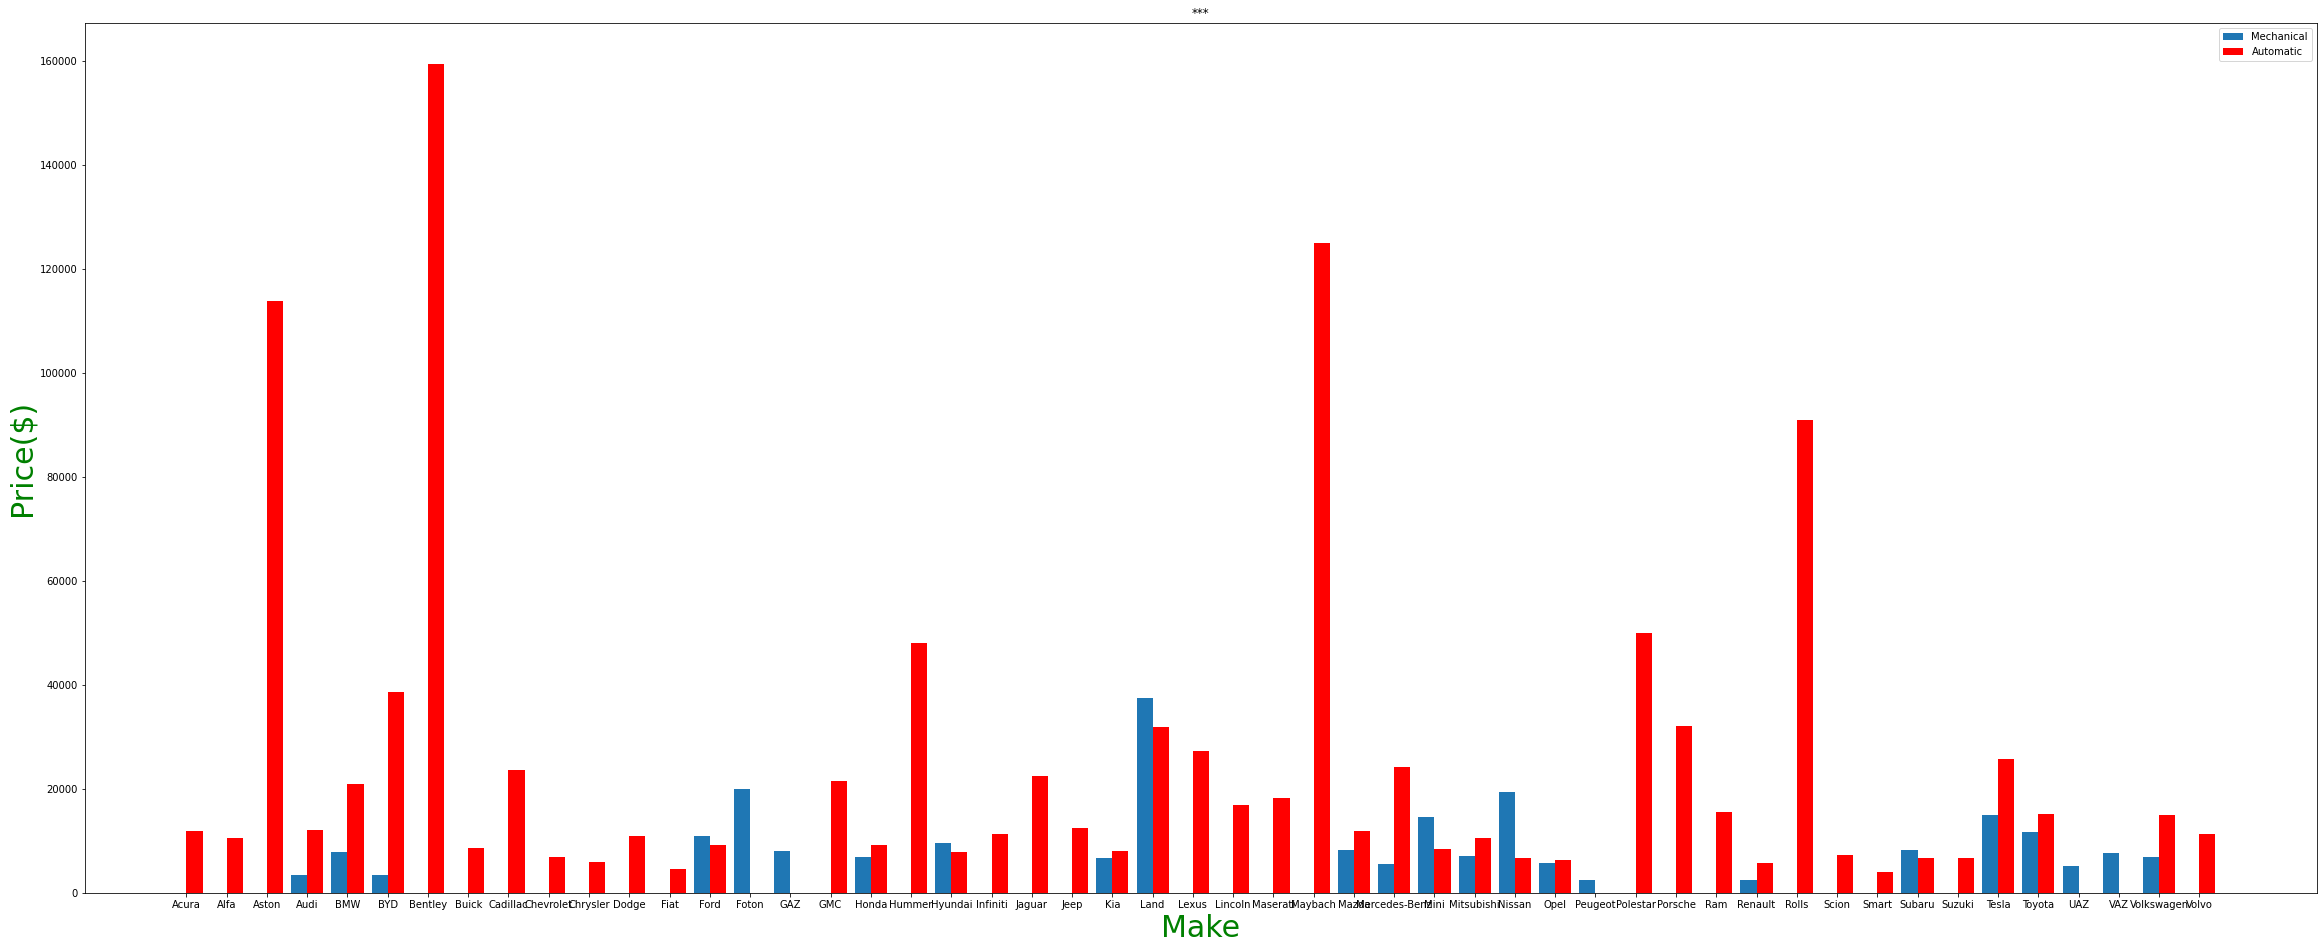

In [ ]:
column = Gearbox.index
mechanical = Gearbox['Price'][0].values.round()
automatic = Gearbox['Price'][1].values.round()
fig, ax = plt.subplots(figsize=(40, 16))
x = np.arange(len(column)) 
width = 0.4
plt.bar(x - width/2, automatic, width, label='Mechanical')
plt.bar(x + width/2, mechanical, width, label='Automatic', color='r')
plt.ylabel('Price($)', fontsize=30, color="green")
plt.xlabel('Make', fontsize=30, color="green")
plt.title('***')
plt.xticks(x, column)
ax.legend()
plt.show();

## 4.7  The **Make** mean **Price** depending on **Hand drive**

In [ ]:
hd = df.groupby('Hand drive')[['Price']].mean()
hd

,Price
Hand drive,
0,7571.290323
1,13474.119618


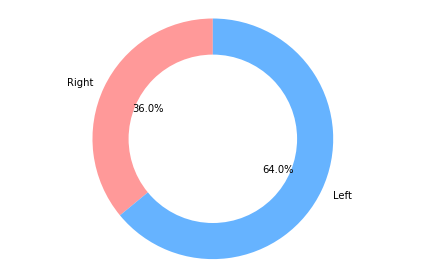

In [ ]:
# Pie chart
labels = ['Right', 'Left']
sizes = hd['Price']
#colors
colors = ['#ff9999','#66b3ff']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

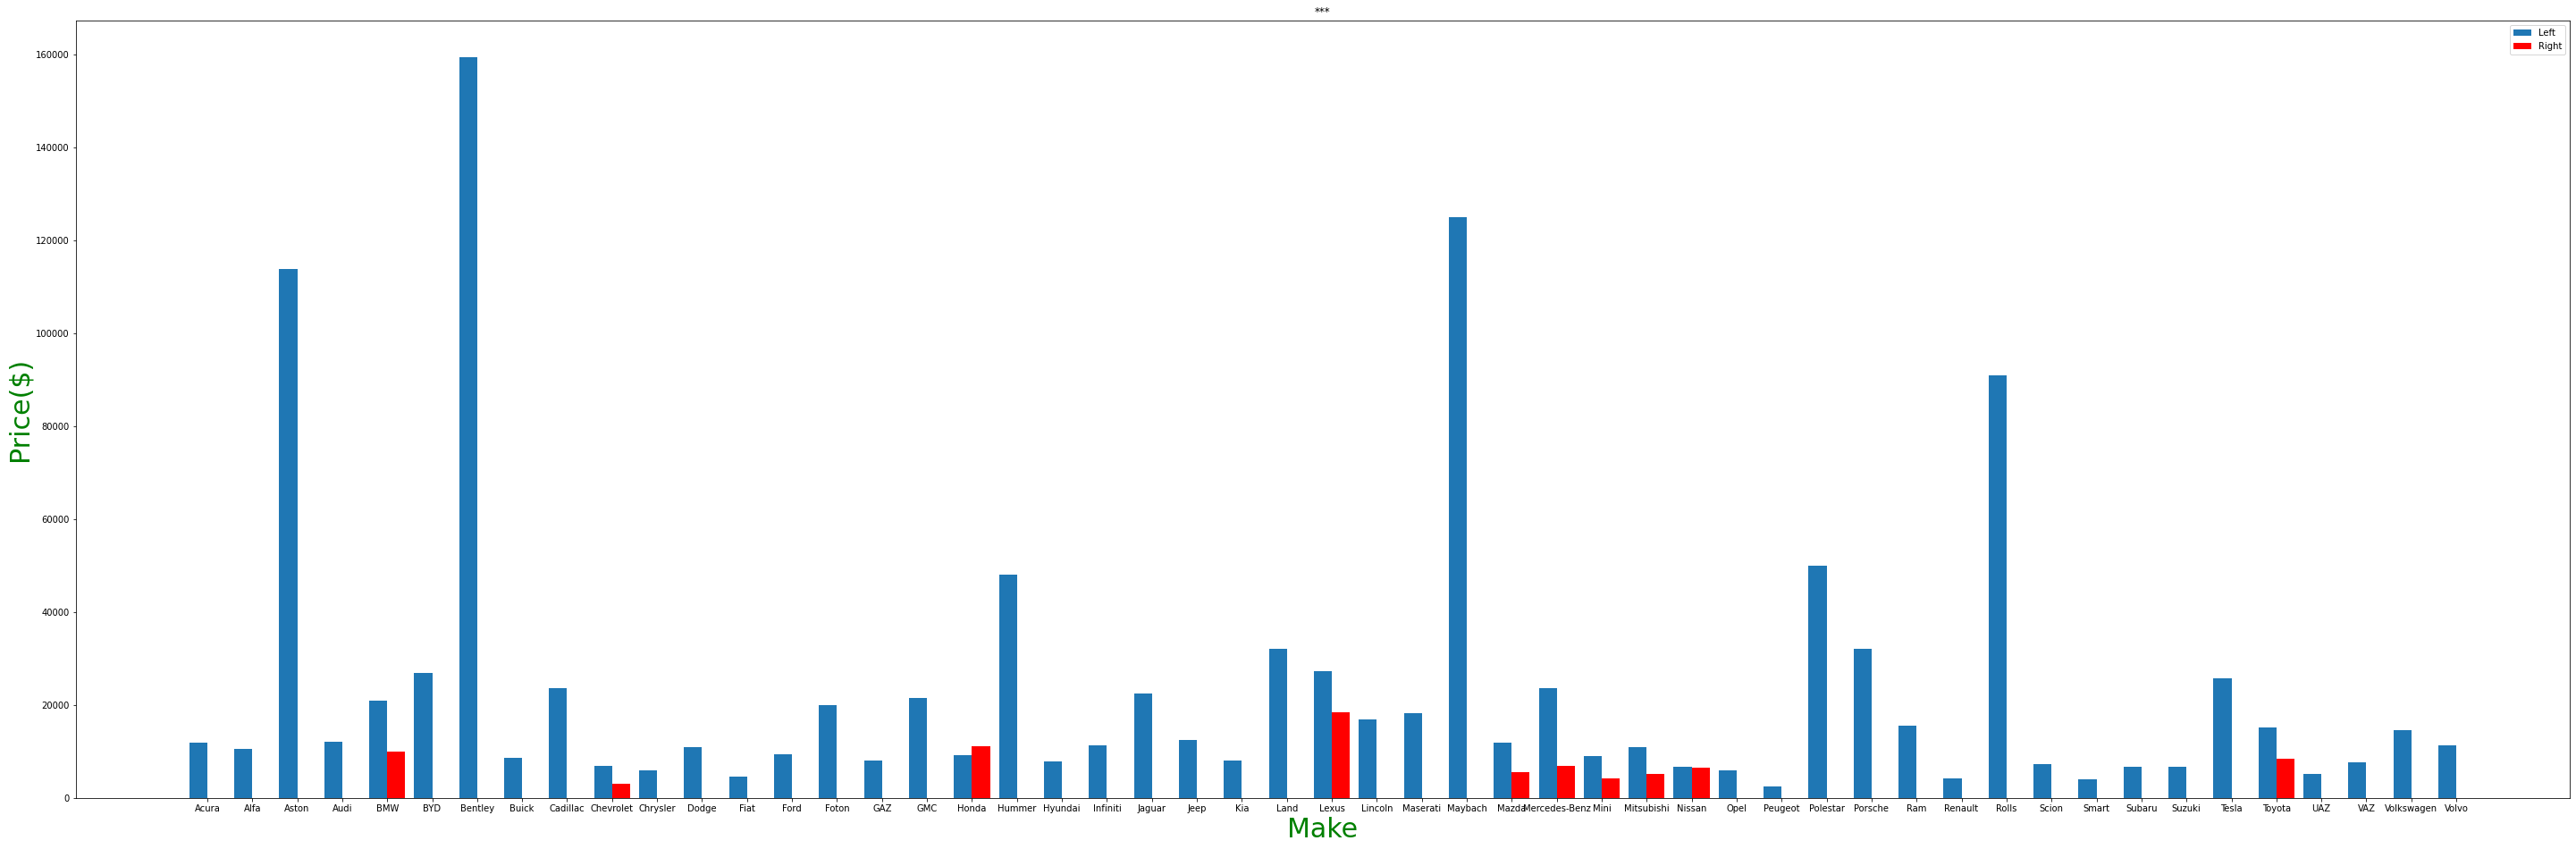

In [ ]:
hand = df.groupby(['Make','Hand drive'])[['Price']].mean().unstack()
column = hand.index
left = hand['Price'][1].values.round()
right = hand['Price'][0].values.round()
fig, ax = plt.subplots(figsize=(50, 16))
x = np.arange(len(column)) 
width = 0.4
plt.bar(x - width/2, left, width, label='Left')
plt.bar(x + width/2, right, width, label='Right', color='r')
plt.ylabel('Price($)', fontsize=30, color="green")
plt.xlabel('Make', fontsize=30, color="green")
plt.title('***')
plt.xticks(x, column)
ax.legend()
plt.show();

## 4.8 The mean **PRICE** per **Engine** of the **Make**

In [ ]:
df_engine = df.groupby(['Make', 'Engine'])[['Price']].mean().unstack()

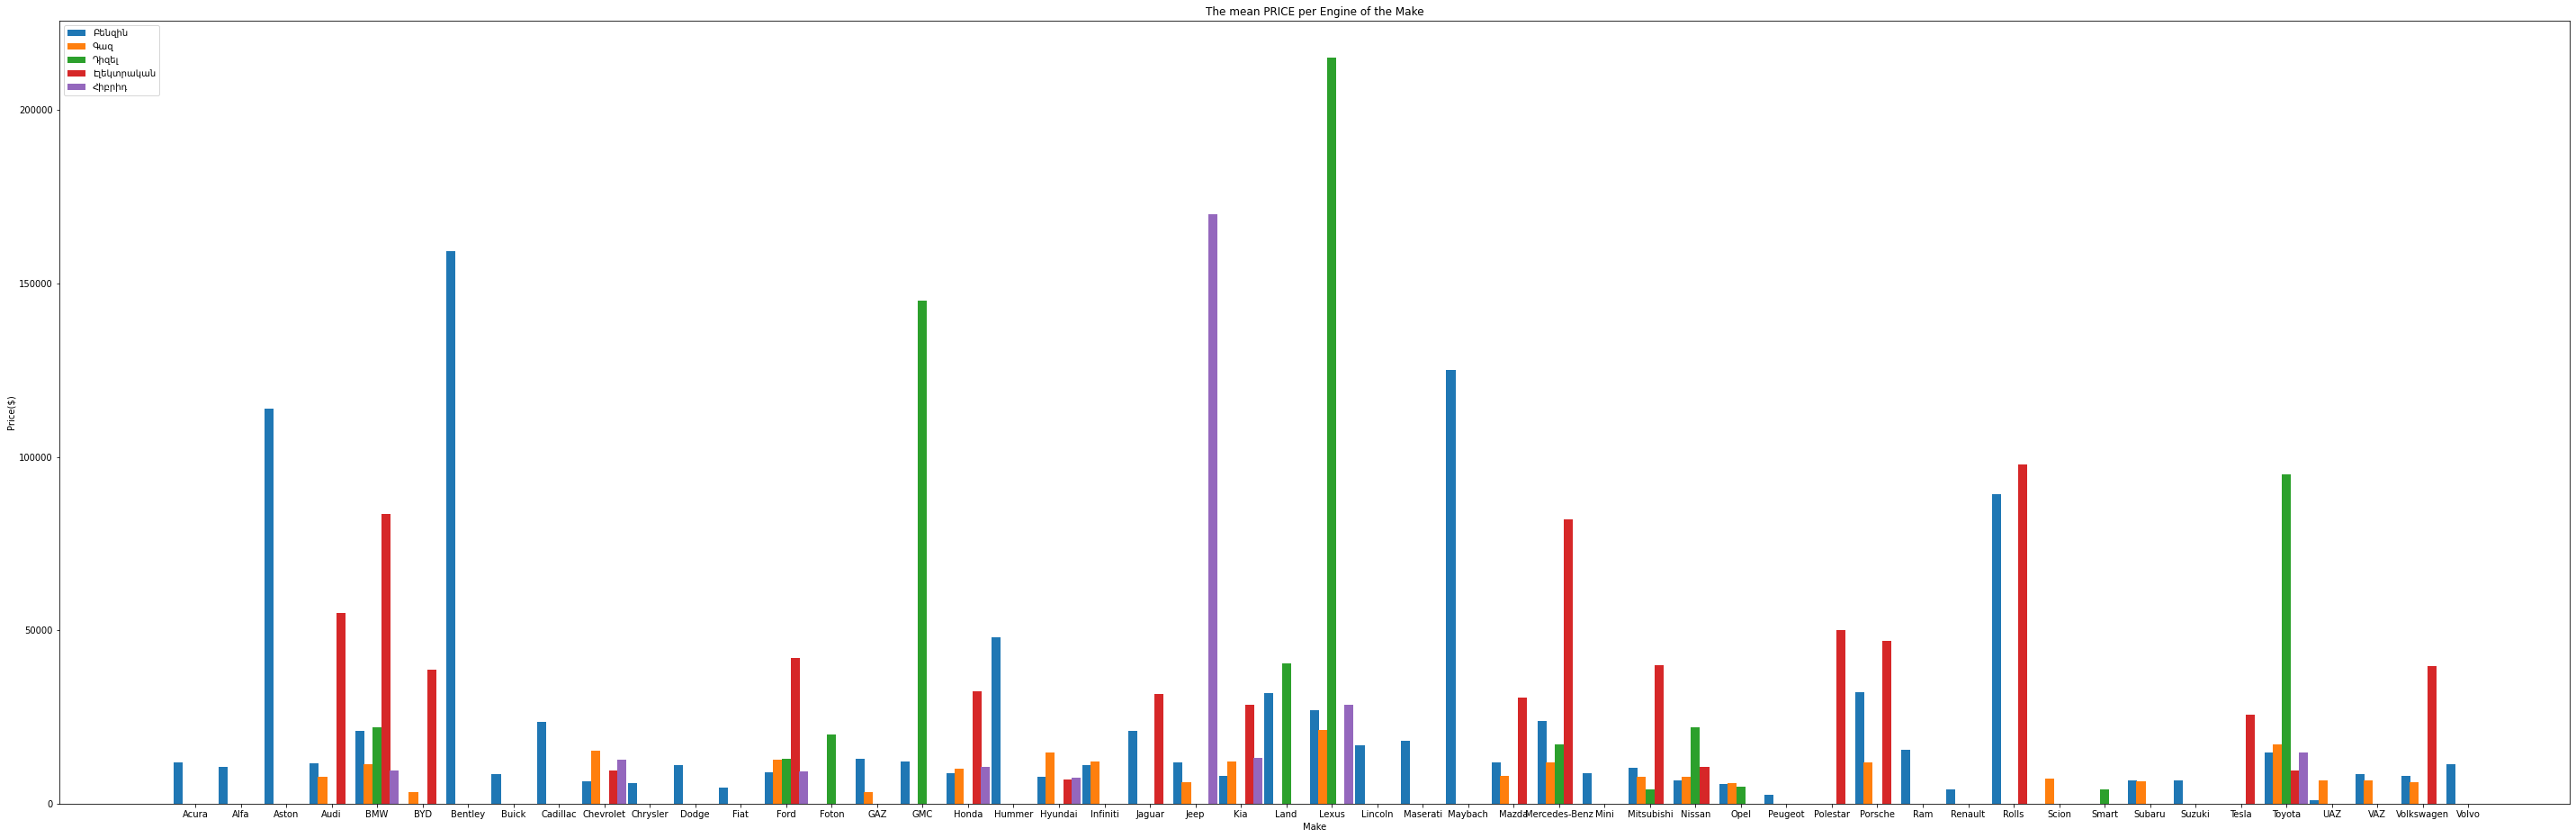

In [ ]:
make_engine = df_engine.index
petrol = df_engine['Price'][' Բենզին'].values
gas = df_engine['Price'][' Գազ'].values
diesel = df_engine['Price'][' Դիզել'].values
electric = df_engine['Price'][' Էլեկտրական'].values
hybrid = df_engine['Price'][' Հիբրիդ'].values

x = np.arange(len(make_engine))
width = 0.2
fig, ax = plt.subplots(figsize=(50, 16))
ax.bar(x - 1.9*width, petrol, width, label='Բենզին')
ax.bar(x - width, gas, width, label='Գազ')
ax.bar(x , diesel, width, label='Դիզել')
ax.bar(x + width, electric, width, label='Էլեկտրական')
ax.bar(x + 1.9*width, hybrid, width, label='Հիբրիդ')
ax.set_title('The mean PRICE per Engine of the Make')
ax.set_xlabel('Make')
ax.set_ylabel('Price($)')
plt.xticks(x, np.array(make_engine))
ax.legend()
plt.show()

## 4.9 Comparison of minimum and maximum prices of **Make**

In [ ]:
# Group the data by "Make" and "Price" columns  and get the min
min_price = df.groupby(['Make'])[['Price']].min()

# Group the data by "Make" and "Price" columns  and get the max
max_price = df.groupby(['Make'])[['Price']].max()

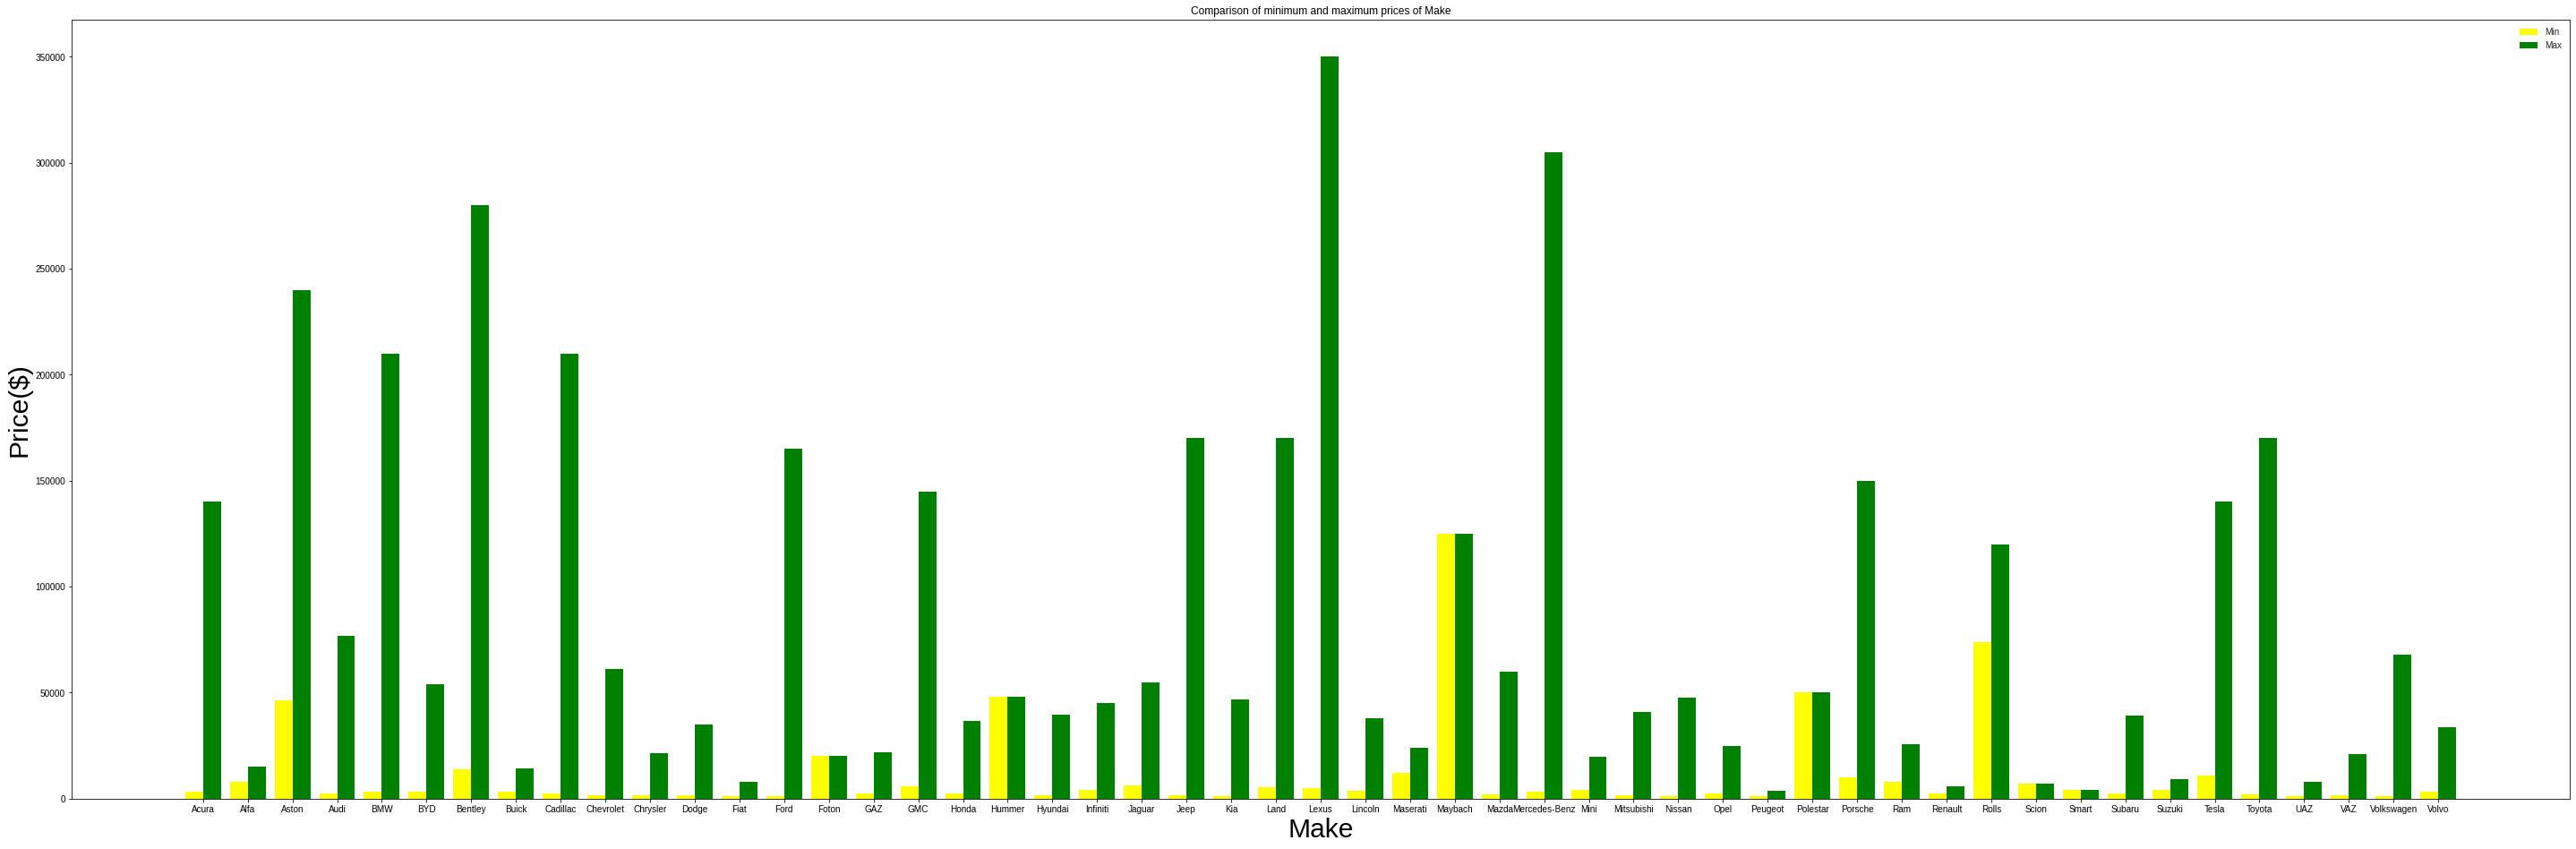

In [ ]:
column = min_price.index
min = min_price['Price'].values.round()
max = max_price['Price'].values.round()
fig, ax = plt.subplots(figsize=(50, 16))
x = np.arange(len(column)) 
width = 0.4
plt.bar(x - width/2, min, width, label='Min', color='yellow')
plt.bar(x + width/2, max, width, label='Max', color='green')
plt.ylabel('Price($)', fontsize=30, color="black")
plt.xlabel('Make', fontsize=30, color="black")
plt.title('Comparison of minimum and maximum prices of Make')
plt.xticks(x, column)
plt.style.use('seaborn-dark-palette')
plt.style.use('seaborn-whitegrid')
ax.legend()
plt.show();

## 4.10 Count of each **Body style**

In [ ]:
# Group the data by "Body style" and get the count
grouped_body = df.groupby("Body style").size().reset_index(name='count')

# Create a new DataFrame with the "Body style" and "count" columns
df_body = grouped_body[["Body style", "count"]]
df_body

,Body style,count
0,Ամենագնաց,3268
1,Կաբրիոլետ / Ռոդսթեր,27
2,Կուպե,252
3,Հետչբեք,374
4,Մինիվեն / Միկրոավտոբուս,71
5,Ունիվերսալ,297
6,Պիկապ,263
7,Սեդան,4567
8,Ֆուրգոն,16


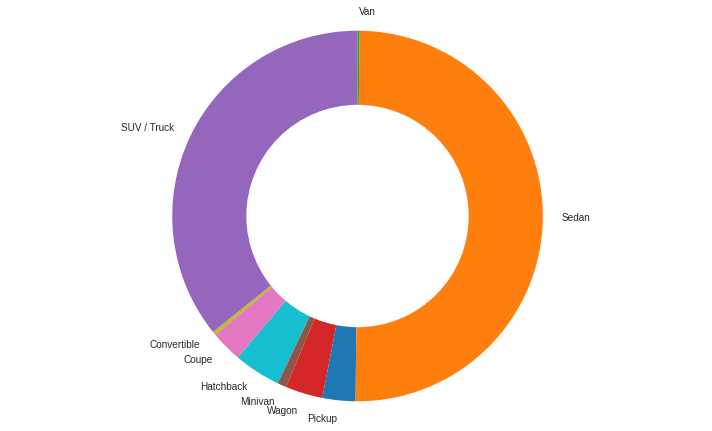

In [ ]:
# Pie chart
labels = ['SUV / Truck', 'Convertible', 'Coupe', 'Hatchback', 'Minivan', 'Wagon', 'Pickup', 'Sedan', 'Van']
sizes =  df_body['count']
#colors
colors = ["#9467bd", "#bcbd22","#e377c2","#17becf", "#8c564b", "#d62728", "#1f77b4", "#ff7f0e","#2ca02c"   ]
 
fig1, ax1 = plt.subplots(figsize=(10,6))
ax1.pie(sizes, colors = colors, labels=labels, startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show();

## 4.11 The mean **Price** depending on **Year**

In [ ]:
# Group the data by "Year" and "Price" columns  and get the means
df.groupby('Year')['Price'].mean()

In [ ]:
df["Year"] = df["Year"].astype(int)
df["Price"] = df["Price"].astype(int)

In [ ]:
x = df[["Make", "Price"]]
y = df[["Make", "Year"]]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution')

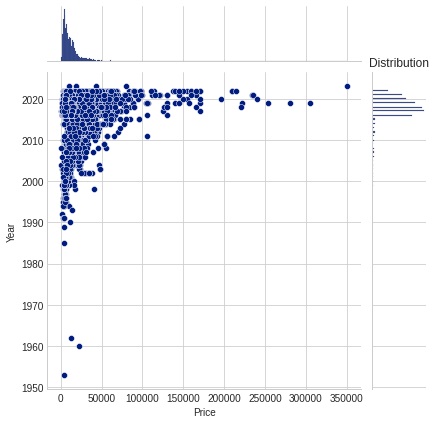

In [ ]:
#distribution
x = df["Price"]
y = df["Year"]
sns_plot = sns.jointplot(x, y)
plt.title('Distribution')

##4.12 The **Price** depending on **Year** and **Mileage**

In [ ]:
from mpl_toolkits.mplot3d import Axes3D


# Extract the year and price columns
year = df["Year"]
price = df["Price"]
mileage = df['Mileage']

# Create a figure and axis for the 3D scatter plot
fig = plt.figure(figsize=(20,16))
ax = fig.add_subplot(111, projection='3d')

# Plot the year and price data as a 3D scatter plot
ax.scatter(year, price, mileage, c='blue', marker='o')

# Label the x, y, and z axes
ax.set_xlabel('Year', fontsize=20)
ax.set_ylabel('Price', fontsize=20)
ax.set_zlabel('Mileage', fontsize=20)

# Show the plot
plt.show()

In [ ]:
df["Price"].mean()

13454.088122605364

##4.13 Correlation Matrices

In [ ]:
df.corr()

,Price,Year,Mileage,Gearbox,Hand drive,Custom cleared
Price,1.000000,0.103828,-0.040199,-0.044590,0.020261,0.379747
Year,0.103828,1.000000,-0.593423,-0.403418,0.182476,-0.493063
Mileage,-0.040199,-0.593423,1.000000,0.225932,-0.090793,0.455824
Gearbox,-0.044590,-0.403418,0.225932,1.000000,0.008226,0.231101
Hand drive,0.020261,0.182476,-0.090793,0.008226,1.000000,-0.109349
Custom cleared,0.379747,-0.493063,0.455824,0.231101,-0.109349,1.000000


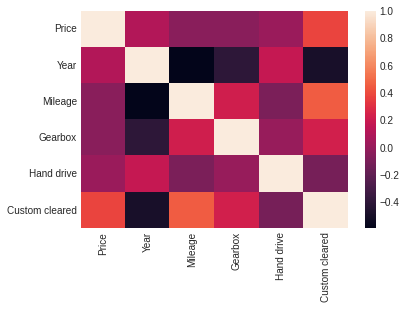

In [ ]:
sns.heatmap(df.corr());

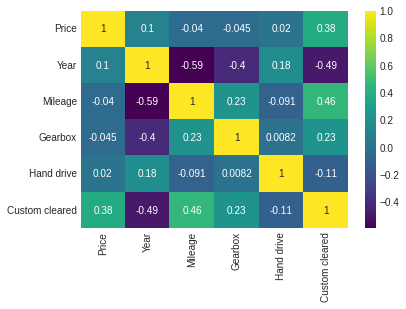

In [ ]:
sns.heatmap(df.corr(), 
        xticklabels=df.corr().columns,
        yticklabels=df.corr().columns, cmap = "viridis", annot=True)

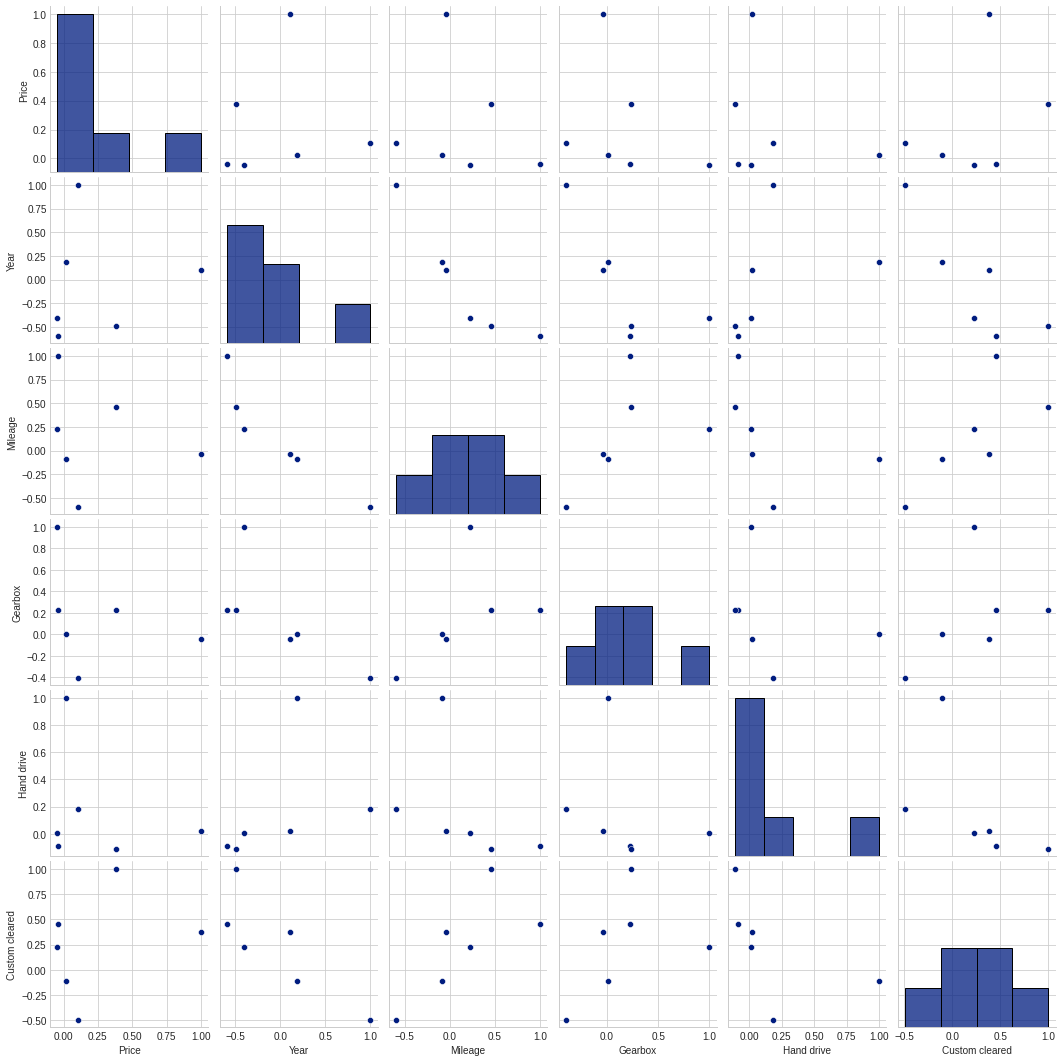

In [ ]:
sns.pairplot(df.corr())

#5) Conclusion

Ստացված տվյալների և վերլուծությունների հիման վրա կարող ենք եզրակացնել՝


1.   հայաստանյան մեքենաների շուկայում ամենամեծ տարածում ունի **'Toyota'** մակնիշի մեքենաները
2.   ՀՀ-ում մեքենայի **միջին արժեքը**, կախված մակնիշից, կազմում է 2500-ից  մինչև 160,000 ԱՄՆ դոլար
3.   **Դիզելային** շարժիչով մեքենաներն ավելի թանկ են, իսկ **գազով** շարժիչները ավելի էժան են
4.   Եզակի(որոնց քանակը շուկայում քիչ է) գույները ավելի թանկ են քան լայն տարածում ունեցողները
5.   Շուկայում **ավտոմատ** փոխանցման տուփով մեքենաներն ավելի շատ են քան **մեխանիկակաները**, կա մեծ գնային տարբերություն կախված փոխանցման տուփից(տե'ս 4.6)
6.   Շուկայում **Ձախ** ղեկով մեքենաներն ավելի շատ են քան **Աջ** ղեկովները, կա մեծ գնային տարբերություն կախված ղեկի աջ կամ ձախ լինելուց (տե'ս 4.7)
7.  Այն մակնիշները, որոնք ներկայացված են ՀՀ շուկայում վաղուց, նրանց փոքրագույն և մեծագույն արժեքները խիստ տարբերվում են, իսկ որոնք շուկայում նոր են գների տարբերությունը թույլ է
8.  Շուկայում գերակշռում է **Սեդան** և **Ամենագնաց** թափք ունեցող մեքենաները
9.  Ըստ **գնի** և **տարեթվի** երկչափ բաշխման, մեքենաները հիմնակնում բաշխված են 2010-2020 թվականների և 10.000  - 30.000 ԱՄՆ դոլար գների միջև
10. Ամենամեծ **կորելացիան** գնի և մաքսզերծվածության մեջ է

